# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importando os dados

base = pd.read_csv("/content/drive/MyDrive/Profissao- Cientista de Dados_M10_support material.csv")
base.head(3)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


In [ ]:
# listando variáveis quantitativas

variaveis_quant = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

In [17]:
# matriz de correlações

base[variaveis_quant].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


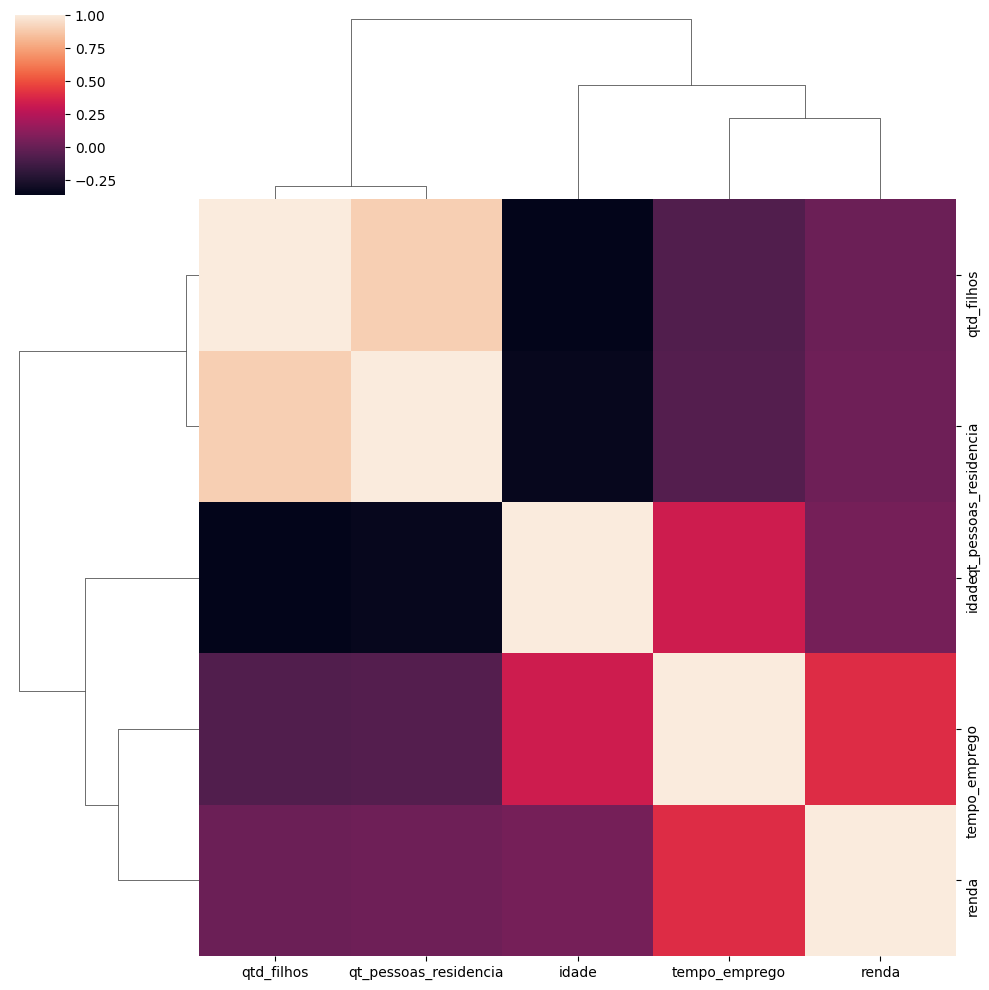

In [20]:
# matriz de correlações gráfica

sns.clustermap(base[variaveis_quant].corr())

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

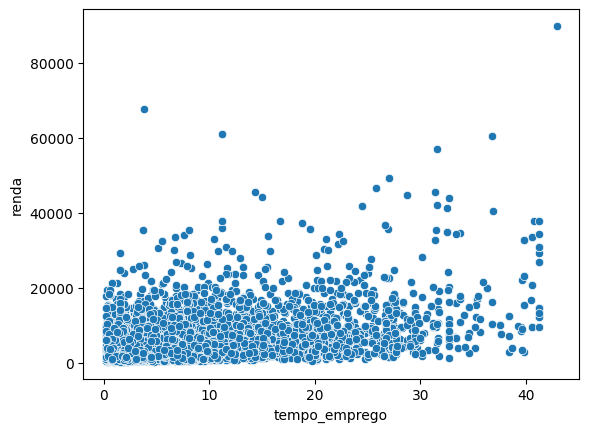

In [10]:
# Observou-se acima que as duas variáveis mais correlacionadas com 'renda' são 'tempo_emprego' e 'idade'

# Scattterplot 'renda' x 'tempo_emprego'

sns.scatterplot(data=base, x='tempo_emprego', y='renda')

<Axes: xlabel='idade', ylabel='renda'>

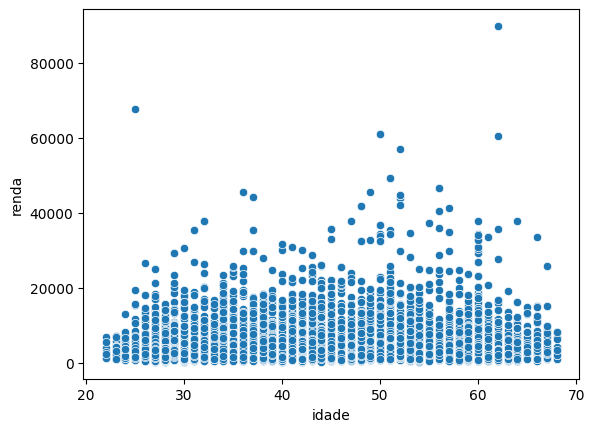

In [11]:
# Scattterplot 'renda' x 'idade'

sns.scatterplot(data=base, x='idade', y='renda')

3) Na sua opinião, há outliers na variável renda?

<Axes: >

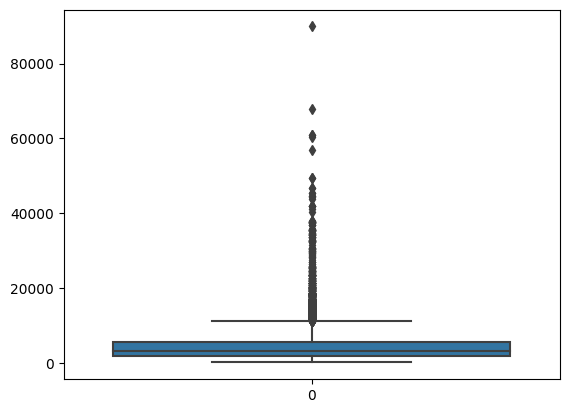

In [15]:
sns.boxplot(base['renda'])

<Axes: xlabel='renda', ylabel='Count'>

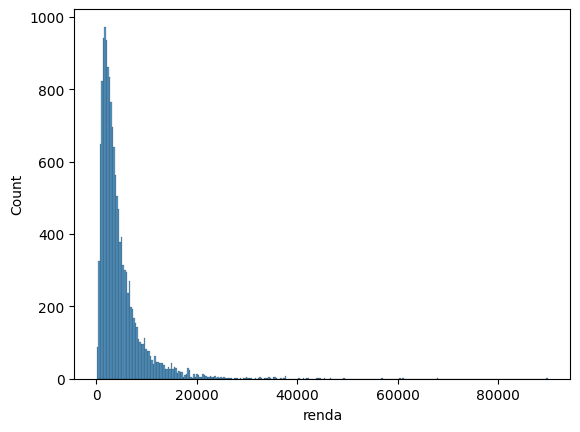

In [16]:
sns.histplot(base['renda'])

In [24]:
base['renda'].max()

89918.04

*A partir dos gráficos acima, é razoável assumir o valor 89918.04 como outlier na variável 'renda', dada a sua grande distância em relação aos demais valores desta mesma variável*

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [27]:
# Criando a variável 'renda_log', correspondente ao logarítmo dos valores da variável 'renda'

base['renda_log'] = np.log(base['renda'])
base['renda_log']

0        8.122442
1        8.715411
2        8.640999
3        8.888300
4        8.298383
           ...   
14995    7.084469
14996    7.831689
14997    7.369506
14998    8.850144
14999    6.901596
Name: renda_log, Length: 15000, dtype: float64

In [29]:
# Nova lista variáveis quantitativas

variaveis_quant_2 = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'renda_log']

In [30]:
base[variaveis_quant_2].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
renda_log,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


<Axes: xlabel='tempo_emprego', ylabel='renda_log'>

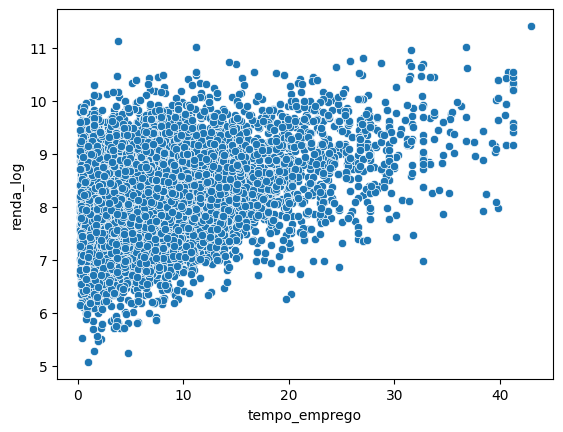

In [28]:
# Observou-se acima que as duas variáveis mais correlacionadas com 'renda_log' são 'tempo_emprego' e 'qt_pessoas_residencia'

# Scattterplot 'renda_log' x 'idade'

sns.scatterplot(data=base, x='tempo_emprego', y='renda_log')

<Axes: xlabel='qt_pessoas_residencia', ylabel='renda_log'>

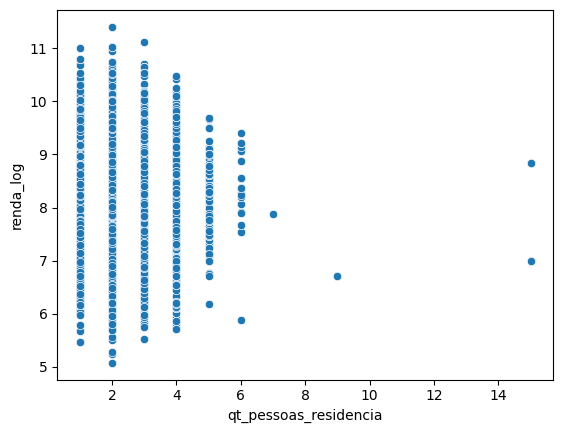

In [31]:
# Scattterplot 'renda_log' x 'qt_pessoas_residencia'

sns.scatterplot(data=base, x='qt_pessoas_residencia', y='renda_log')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

*Não se observaram, em função da adição da variável 'renda_log' (correspondente ao logarítmo dos valores da variável 'renda'), efeitos significativos para a análise dos dados*